# Analisando vinhos

Objetivo: Familiarização com a linguagem python e com as bibliotecas clássicas do python

## 1.1 - Desenvolvimento e Questões

### Libs

In [134]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import SelectKBest, f_classif

### Download da base de dados

In [135]:
wineQuality = fetch_ucirepo(id=186) 

In [136]:
wineQuality

{'data': {'ids': None,
  'features':       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
  0               7.4              0.70         0.00             1.9      0.076   
  1               7.8              0.88         0.00             2.6      0.098   
  2               7.8              0.76         0.04             2.3      0.092   
  3              11.2              0.28         0.56             1.9      0.075   
  4               7.4              0.70         0.00             1.9      0.076   
  ...             ...               ...          ...             ...        ...   
  6492            6.2              0.21         0.29             1.6      0.039   
  6493            6.6              0.32         0.36             8.0      0.047   
  6494            6.5              0.24         0.19             1.2      0.041   
  6495            5.5              0.29         0.30             1.1      0.022   
  6496            6.0              0.21         0.38

In [137]:
dataWines = pd.DataFrame(wineQuality['data']['features'])
labelsDataWines = wineQuality.data.original.color.map({'white': 0, 'red': 1})
display(dataWines)
display(labelsDataWines)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int64

In [138]:
print(f'Dados gerais do dataset: \n')
dataWines.info()


Dados gerais do dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


Baseado nas informações básicas do dataset (dataWines.info) é possível notar que não há variáveis com dados nulos, isso indica que não será necessário realizar nenhum tipo de tratamento para dados faltantes.

## 1.2 - Visualize a dimensão da matriz de dados e do vetor de rótulo

In [139]:
print(f'Dimensão da matriz de dados: {dataWines.shape}\n')
print(f'Dimensão da matriz de rótulos: {labelsDataWines.shape}')



Dimensão da matriz de dados: (6497, 11)

Dimensão da matriz de rótulos: (6497,)


## 1.3 - Realize uma análise criteriosa da base de dados.

Primeiro, é necessário verificar se existem inconsistência na base de dados. Para isso, realize os seguintes passos para validar a a base. Verifique: a integridade dos dados, consistência dos tipos de dados, valores, relações entre as features

A base é consistente

In [140]:
print('Valores nulos no dataset: \n')
dataWines.isnull().sum()

Valores nulos no dataset: 



fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [141]:
dataWines.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [142]:
labelsDataWines.dtypes

dtype('int64')

Lembrando que 0 é vinho branco e 1 vinho tinto

In [143]:
labelsDataWines.value_counts()

color
0    4898
1    1599
Name: count, dtype: int64

Todas as variáveis estão com os tipos que deveriam possuir, não existem valores nulos. Isso garante a consistência dos dados. 
**Um ponto importante a ser levado em consideração é o desbalanceamento de classe, pois impacta diretamente o tipo de métrica de avaliação do modelo de machine learning**.

## 4 - Apresente uma análise estatística dos daods que embase quais variáveis de entrada são mais relevantes se quisermos classificar o vinho pelo tipo. Justifique.

Esta etapa, também conhecido como *Feature Selection* é a etapa responsável por remover informações redundadntes ou não significativas do modelo [1].
A escolha das variáveis é uma das etapas mais importantes do desenvolvimento de um modelo classificador. Isso ocorre porque as variáveis são responsáveis por conduzir o modelo ou ao menos partir da direção definida pela regra do negócio. 
Sendo assim, as variáveis podem direcionar o modelo para um caminho positivo, como também podem "confundi-lo" para o caso de informações redundantes que geram incertezas.
Este trabalho será desenvolvido com base nos métodos de seleção de características por filtro, que avalia a relevância das variáveis fora dos modelos preditivos com técnicas estatísticas para checar a relação entre cada variável de entrada e a variável alvo. Posteriormente, escolhem as variáveis que passam pelos critéterios definidos [1].
Inicalmente, será feita uma análise de correlação para eliminar possíveis variávies redundantes, em seguida, aplicar uma análise de variancia das variávies (ANOVA, **AN**alysis Of **VA**riance), essa técnica é aplicada quando lidamos com múltiplas variáveis independentes (as características dos vinhos), permitindo discernir quais dessas características têm um impacto estatisticamente significativo na variável dependente, proporcionando uma forma de selecionar as variáveis para o modelo

Correlação de variáveis

In [144]:
correlationMatrix = dataWines.corr()

Text(0.5, 1.0, 'Correlação entre as variáveis do dataset')

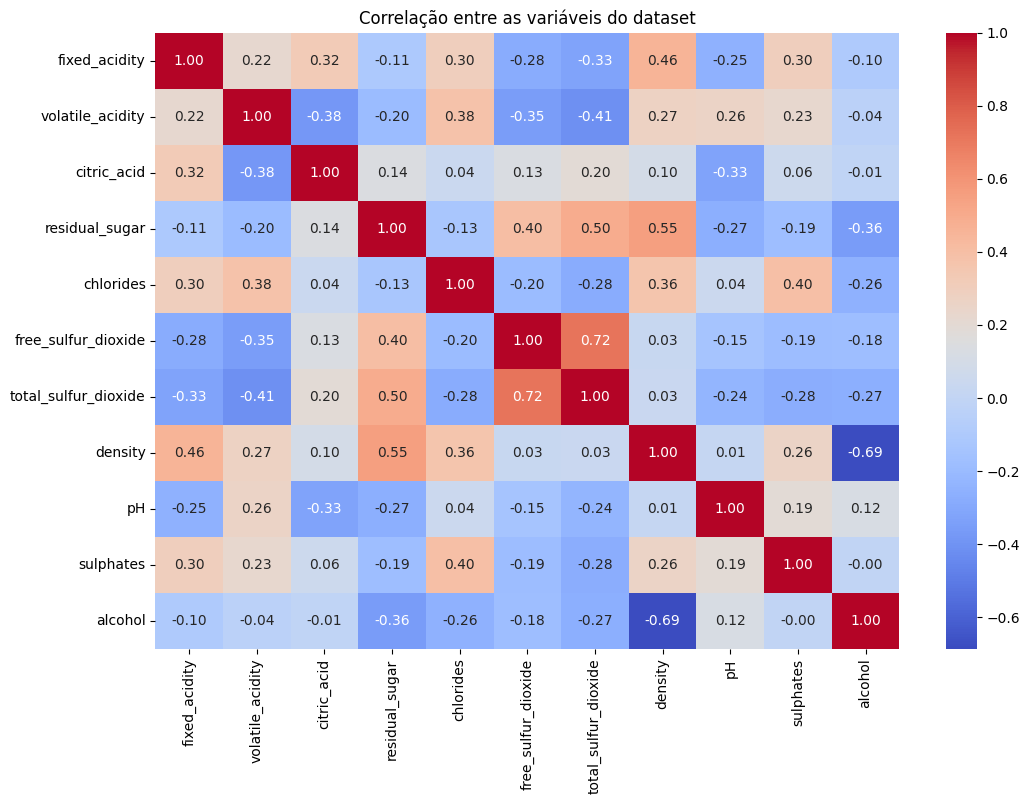

In [145]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre as variáveis do dataset')

Com base no heatmap, não foi possível identificar correlações altíssimas (acima de 0.9), no entanto, baseado no contexto de muitas variáveis é possível que as variáveis: free_sulfur_dioxide e total_sulfur_dioxide; sejam redundantes para o modelo.

ANOVA

In [146]:
dependentVariables = dataWines
independentVariable = labelsDataWines
newData = pd.concat([dependentVariables, independentVariable], axis=1)
anovaResults = []

for column in dependentVariables.columns:
    model = ols(f'{column} ~ C(color)', data=newData).fit()
    anovaTable = sm.stats.anova_lm(model, typ=2)
    fValue = anovaTable['F'][0]
    pValue = anovaTable['PR(>F)'][0]
    anovaResults.append({'Variable': column, 'F Value': fValue, 'Pr > F': pValue})

anovaResultsDataset = pd.DataFrame(anovaResults)
anovaResultsDataset = anovaResultsDataset .sort_values(by='F Value', ascending=False)
selectedVariables = anovaResultsDataset 

print(f"Variáveis selecionadas com base nos maiores valores F: {selectedVariables}")


Variáveis selecionadas com base nos maiores valores F:                 Variable      F Value         Pr > F
6   total_sulfur_dioxide  6252.795580   0.000000e+00
1       volatile_acidity  4829.317088   0.000000e+00
4              chlorides  2315.829484   0.000000e+00
9              sulphates  2021.707535   0.000000e+00
0          fixed_acidity  2016.510058   0.000000e+00
5    free_sulfur_dioxide  1858.136361   0.000000e+00
7                density  1169.655246  7.319605e-236
3         residual_sugar   899.766289  2.959354e-185
8                     pH   789.049537  5.923308e-164
2            citric_acid   236.389214   2.003736e-52
10               alcohol     7.067691   7.867874e-03


O valor F da ANOVA indica a variação entre os grupos em relação à variação dentro dos prórpios grupos. Um valor F maior sugere que há uma diferença estatisticamente significativa entre os grupos. Logo, as variáveis com os maiores valores F, idicam que essas variáveis têm uma maior influência na diferenciação entre os tipos de vinho

Seleção das melhores variáveis utilizando Scikit

Na documentação do scikit maiores detalhes sobre os parâmetros são encontrados: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Para o entendimento e replicação das mesmas variáveis, o parâmetro *f_classif* indica que o critério de avaliação/seleção utilizado será o ANOVA.

*k* é o número de variáveis selecionadas

In [147]:

selector = SelectKBest(score_func=f_classif)
selector.fit_transform(dependentVariables, independentVariable)
selectedIndices = selector.get_support(indices=True)
selectedVariables = dependentVariables.columns[selectedIndices]
print(f"Variáveis selecionadas com base no método SelectKBest \
(f_classif):\n {selectedVariables.tolist()}")

Variáveis selecionadas com base no método SelectKBest (f_classif):
 ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates']


As variáveis escolhidas são: 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates. 
Isso Apenas pelo fato de que o SelectKBest utiliza outras técnicas de estarísticas na escolha dos variáveis e não apenas o ANOVA F para cada variável individualmente.
Para efeitos de comparação, ambos os métodos de seleção serão testados

## 5 - Escolha duas das variáveis de entrada e faça um gráfico de dispersão para visualizar a distribuição dos dados de cada classe de vinho

In [154]:
def plotScatterGraph2Labels(data, variable1, variable2, label, labelName):
    plt.figure(figsize=(10, 6))
    dataLabel1 = data[data[label] == 0]
    dataLabel2 = data[data[label] == 1]
    plt.scatter(dataLabel1 [variable1], dataLabel1[variable2], color='blue', label=labelName[0])
    plt.scatter(dataLabel2 [variable1], dataLabel2[variable2], color='red', label=labelName[1])
    plt.title(f'Distribuição dos dados de vinho em relação a {variable1} e {variable2}')
    plt.xlabel(variable1)
    plt.ylabel(variable2)
    plt.legend()
    plt.grid(True)
    plt.show()


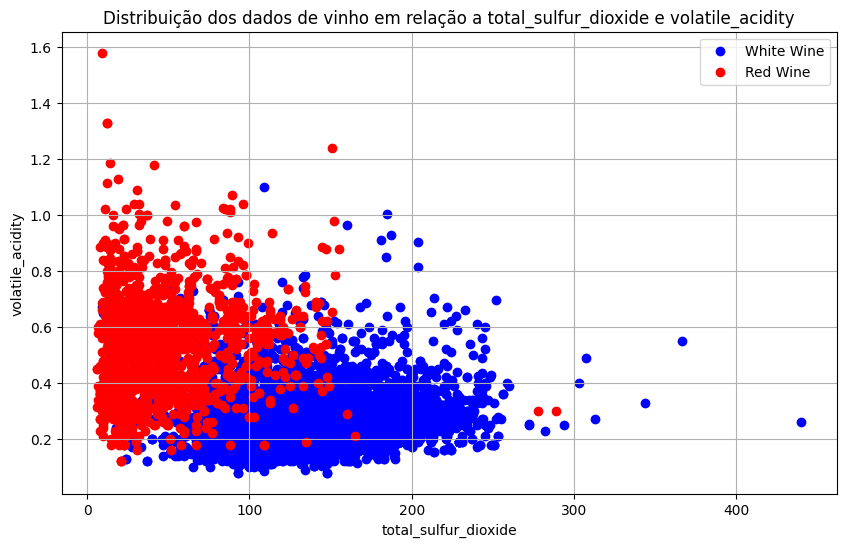

In [156]:
variable1 = 'total_sulfur_dioxide'
variable2 = 'volatile_acidity'

plotScatterGraph2Labels(newData, variable1, variable2, 'color', ['White Wine', 'Red Wine'])

## Referências

- [1] KUHN, Max et al. Applied predictive modeling. New York: Springer, 2013.
- [2] KALEMIS, Ilias. Anova Regression Correlation analysis. A portfolio of work in Statistical Techniques with SPSS.